# How bad is this Storm?
## Or local climate data anlaysis
This notebook pulls data from NOAA's Global Historical Climateology Network (GHCN) to see how extreem our recent rain events have been.

I requested daily summaries for the last 5 years from NOAA's download page for Arlington County, VA (FIPS:51013).
We can do updates with the API later if we want to.

Alternate: Local Climate Data from WASHINGTON REAGAN NATIONAL AIRPORT, VA US (WBAN:13743)

### Data
The primary data I will be using is a custom GHCN-Daily CSV for the 8 Arlington, VA weather stations.
This file has only Station Info, Date, Percipitation amount, and Temperature extremes, making it far smaller than the TCN data file I found earlier for National Airport.

In [2]:
#libraries
import pandas as pd
from plotnine import *
%matplotlib inline

o:\pdes\prism\sullivan\kaggle\python_for_r\custpy\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#load data
arl_data = pd.read_csv("1349838.csv")
arl_data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.0967,82.0,2014-01-06,0.36,NaN,NaN,NaN,NaN,NaN
1,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.0967,82.0,2014-01-07,0.02,NaN,NaN,NaN,NaN,NaN
2,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.0967,82.0,2014-01-08,0.00,0.0,NaN,NaN,NaN,NaN
3,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.0967,82.0,2014-01-09,0.00,0.0,NaN,NaN,NaN,NaN
4,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.0967,82.0,2014-01-10,0.09,NaN,NaN,NaN,NaN,NaN


### Daily Averages
The first analysis we want to do is compute and visualize the daily percipitation averages. We will leverage pandas' datetime tools to do the rolloup.

In [4]:
#convert to datetime
#print(arl_data["DATE"].dtypes)
arl_data["dt"] = pd.to_datetime(arl_data["DATE"])
#print(arl_data["dt"].dtypes)
#convert to day of the year
arl_data["doty"] = arl_data["dt"].dt.dayofyear
arl_data["week"] = arl_data["dt"].dt.weekofyear
#highlight this year
arl_data['highlight'] = [1 if yr==2018 else 0 for yr in arl_data["dt"].dt.year]

o:\pdes\prism\sullivan\kaggle\python_for_r\custpy\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


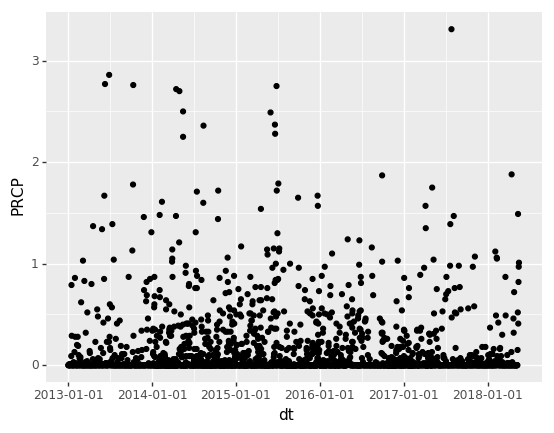

<ggplot: (-9223372036835564968)>

In [5]:
#plot every day to see all data
ggplot(arl_data, aes(x="dt", y="PRCP")) + geom_point()

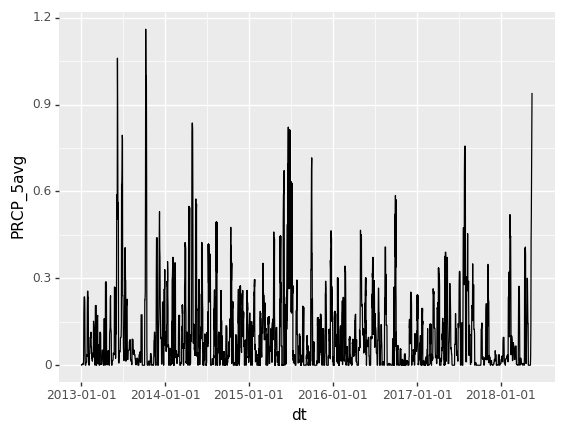

<ggplot: (19648369)>

In [16]:
#try 5-day moving average 
arl_data["PRCP_5avg"] = arl_data.rolling(5, center=True, on="dt")["PRCP"].mean()
ggplot(arl_data[arl_data["PRCP_5avg"].notnull()], aes(x="dt", y="PRCP_5avg")) + geom_line()

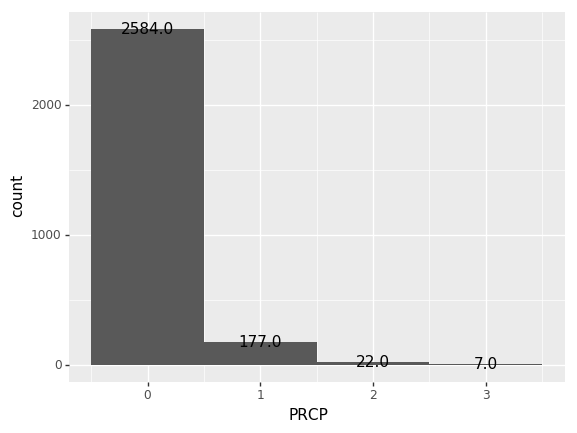

<ggplot: (19393179)>

In [24]:
#distribution of days with X-Y incheas may be more interesting
ggplot(arl_data[arl_data["PRCP"].notnull()], aes(x="PRCP")) + stat_bin(binwidth=1) + stat_bin(aes(label="..count.."), binwidth=1, geom="text")

o:\pdes\prism\sullivan\kaggle\python_for_r\custpy\lib\site-packages\plotnine\layer.py:363: UserWarning: stat_boxplot : Removed 1 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
o:\pdes\prism\sullivan\kaggle\python_for_r\custpy\lib\site-packages\plotnine\layer.py:450: UserWarning: geom_point : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


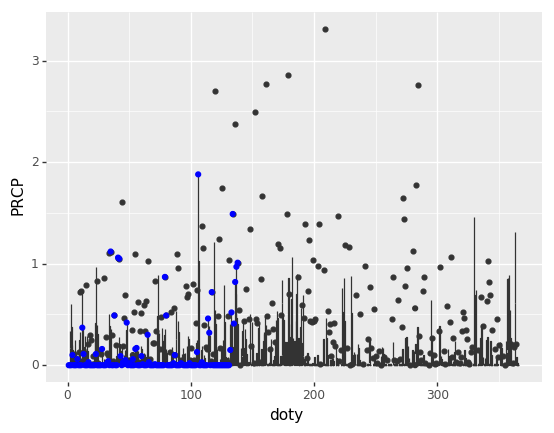

<ggplot: (21534584)>

In [53]:
#plot percip by doty (mean of all stations)
pltdata = arl_data.groupby('dt').mean()
#ggplot(arl_data, aes(x="doty", y="PRCP")) + geom_boxplot(aes(group='doty'))
#highlight points from this year
(ggplot(pltdata, aes(x="doty", y="PRCP")) 
 + geom_boxplot(aes(group='doty')) 
 + geom_point(pltdata[pltdata.index.year==2018], aes(x="doty", y="PRCP"), color='blue')
)

In [38]:
arl_data[arl_data["dt"].dt.year==2017]

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,dt,doty,highlight
757,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.09670,82.0,2017-01-01,0.00,0.0,NaN,NaN,NaN,NaN,2017-01-01,1,0
758,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.09670,82.0,2017-01-02,0.09,NaN,NaN,NaN,NaN,NaN,2017-01-02,2,0
759,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.09670,82.0,2017-01-03,0.34,NaN,NaN,NaN,NaN,NaN,2017-01-03,3,0
760,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.09670,82.0,2017-01-04,0.34,NaN,NaN,NaN,NaN,NaN,2017-01-04,4,0
761,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.09670,82.0,2017-01-05,0.03,NaN,NaN,NaN,NaN,NaN,2017-01-05,5,0
762,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.09670,82.0,2017-01-06,0.00,0.0,NaN,NaN,NaN,NaN,2017-01-06,6,0
763,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.09670,82.0,2017-01-07,0.00,0.0,NaN,NaN,NaN,NaN,2017-01-07,7,0
764,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.09670,82.0,2017-01-19,0.00,0.0,NaN,NaN,NaN,NaN,2017-01-19,19,0
765,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.09670,82.0,2017-01-20,0.00,0.0,NaN,NaN,NaN,NaN,2017-01-20,20,0
766,US1VAAR0008,"ARLINGTON 0.3 E, VA US",38.8791,-77.09670,82.0,2017-01-21,0.00,NaN,NaN,NaN,NaN,NaN,2017-01-21,21,0


In [43]:
arl_data.groupby('dt').mean()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,doty,highlight
dt,,,,,,,,,,,
2013-01-01,38.8472,-77.03454,3.0,0.00,0.0,0.0,NaN,45.0,38.0,1,0
2013-01-02,38.8472,-77.03454,3.0,0.00,0.0,0.0,NaN,40.0,30.0,2,0
2013-01-03,38.8472,-77.03454,3.0,0.00,0.0,0.0,NaN,38.0,30.0,3,0
2013-01-04,38.8472,-77.03454,3.0,0.00,0.0,0.0,NaN,46.0,27.0,4,0
2013-01-05,38.8472,-77.03454,3.0,0.01,0.0,0.0,NaN,46.0,31.0,5,0
2013-01-06,38.8472,-77.03454,3.0,0.00,0.0,0.0,NaN,52.0,34.0,6,0
2013-01-07,38.8472,-77.03454,3.0,0.00,0.0,0.0,NaN,49.0,34.0,7,0
2013-01-08,38.8472,-77.03454,3.0,0.00,0.0,0.0,NaN,53.0,30.0,8,0
2013-01-09,38.8472,-77.03454,3.0,0.01,0.0,0.0,NaN,54.0,34.0,9,0
